## Research Questions – Part1 – Overall
  1.	Import libraries & set directory paths
  2.	Import Portal data, check dimensions and data types (stone_signs_portal_v2.0_zones.csv)
  3.	Change datetime string columns to datetime data types
            Address research questions:
            •	Qu.1) How much revenue has been generated since Portal conception? 
                -	1st January 2020 to 31st Aug 2021 - 20 months.
            •	Qu.2) Compare revenue generate in 2020 to revenue in 2021.
            •	Qu.3) Compare the average amount of revenue generate over a month for 2020 and 2021
            •	Qu.4) What is the average daily revenue generated?
                -	Display as bar chart - monthly revenue for 2020 and 2021
            •	Qu.5) How do the different areas compare in terms of work request?
                -	Sales, Letting, Sponsorship, Commercial, Maintenance.
                -	Display as pie chart % contribution to revenue
                -	Export to: stone_signs_portal_v2.1_month_workcate.csv

### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from datetime import date
import datetime
import matplotlib.patches as mpatches

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## Import Portal Data

In [4]:
df_portal = pd.read_csv(os.path.join(dataset,'stone_signs_portal_v2.0_zones.csv'))
df_portal.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,gross_charge,invoice_datetime,paid_datetime,payment_duration_days,harvesine_distance_miles,latitude_group,longitude_group,zone,zone_area,is_up
0,9215,13/10/2020 13:36,18/10/2020 08:52,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,4.80,29/10/2020 21:40,10/12/2020 15:50,41.8,3508.926836,1.0,2.0,12,SE Sussex,1
1,8199,26/11/2020 20:33,28/11/2020 11:48,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,4.62,29/11/2020 12:48,05/02/2021 19:16,68.3,3508.978003,1.0,2.0,12,SE Sussex,1
2,7783,04/09/2020 20:18,05/09/2020 08:09,0.49,11.9,Lextons,LEX,Lextons @Hove,600,Sales,...,0.00,29/09/2020 20:26,10/12/2020 15:46,71.8,3508.978003,1.0,2.0,12,SE Sussex,0
3,8199,18/09/2020 18:44,19/09/2020 14:15,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,4.62,29/09/2020 20:26,10/12/2020 15:46,71.8,3508.978003,1.0,2.0,12,SE Sussex,0
4,9209,13/10/2020 13:29,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,4.80,29/10/2020 21:40,10/12/2020 15:50,41.8,3509.207113,1.0,2.0,12,SE Sussex,0


### check dimensions & data types

In [5]:
df_portal.shape

(29255, 36)

In [6]:
df_portal.dtypes

request_id                    int64
request_datetime             object
completed_datetime           object
completed_duration_days     float64
completed_duration_hours    float64
agent_name                   object
agent_code                   object
branch_name                  object
branch_code                   int64
sign_category                object
sign_action                  object
board_type                   object
sign_type                    object
address_1                    object
address_2                    object
address_3                    object
town                         object
postcode                     object
latitude                    float64
longitude                   float64
quantity                      int64
additional_info              object
request_status               object
payment_status               object
net_charge                  float64
vat                         float64
gross_charge                float64
invoice_datetime            

### convert datetime columns from string to datetime data type

In [7]:
df_portal['request_datetime'] = pd.to_datetime(df_portal['request_datetime'], format='%d/%m/%Y %H:%M')
df_portal['completed_datetime'] = pd.to_datetime(df_portal['completed_datetime'], format='%d/%m/%Y %H:%M')
df_portal['invoice_datetime'] = pd.to_datetime(df_portal['invoice_datetime'], format='%d/%m/%Y %H:%M')
df_portal['paid_datetime'] = pd.to_datetime(df_portal['paid_datetime'], format='%d/%m/%Y %H:%M')
df_portal.dtypes

request_id                           int64
request_datetime            datetime64[ns]
completed_datetime          datetime64[ns]
completed_duration_days            float64
completed_duration_hours           float64
agent_name                          object
agent_code                          object
branch_name                         object
branch_code                          int64
sign_category                       object
sign_action                         object
board_type                          object
sign_type                           object
address_1                           object
address_2                           object
address_3                           object
town                                object
postcode                            object
latitude                           float64
longitude                          float64
quantity                             int64
additional_info                     object
request_status                      object
payment_sta

## Research Questions

## Qu.1)  How much revenue has been generated since Portal conception?
    1st January 2020 to 31st Aug 2021 (20 months)

In [8]:
total_revenue = df_portal['net_charge'].sum()
total_revenue

111826.94999999998

In [9]:
per_month = total_revenue/20
per_month

5591.347499999999

## Qu.2) Compare revenue generate in 2020 to revenue in 2021.

### create subsets

In [10]:
df_2020 = df_portal.loc[df_portal['completed_datetime']< '2021-01-01 00:00:00']
df_2020.shape

(17667, 36)

In [11]:
df_2021 = df_portal.loc[df_portal['completed_datetime']>= '2021-01-01 00:00:00']
df_2021.shape

(11540, 36)

### check number of records totals 29,225 (less 48 pending requests) = 29,207

In [12]:
17667 + 11540

29207

### calculate annual revenue: 12 months for 2020 and 8 months for 2021

In [13]:
revenue_2020 = df_2020['net_charge'].sum()
revenue_2020

66897.49999999999

In [14]:
revenue_2021 = df_2021['net_charge'].sum()
revenue_2021

44929.45

### check revenue figures total £111,827

In [15]:
revenue_2020 + revenue_2021

111826.94999999998

## Qu.3) Compare the average amount of revenue generate over a month for 2020 and 2021

In [16]:
revenue_2020/12

5574.791666666665

In [17]:
revenue_2021/8

5616.18125

## Qu.4) What is the average daily revenue generated?

In [18]:
revenue_2020/365

183.28082191780817

In [19]:
revenue_2021/243

184.89485596707817

## Create graph to show revenue by month for 2020 & 2021

### create new columns for month, month_no & year
        exclude incomplete requests as this will affect the data type of the resulting columns

In [8]:
df_portal = df_portal[pd.notnull(df_portal['completed_datetime'])]
df_portal.shape

(29207, 36)

In [9]:
df_portal['month_no'] = df_portal['completed_datetime'].dt.month
df_portal['month'] = df_portal['completed_datetime'].dt.strftime('%b')
df_portal['year'] = df_portal['completed_datetime'].dt.year
df_portal.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,payment_duration_days,harvesine_distance_miles,latitude_group,longitude_group,zone,zone_area,is_up,month_no,month,year
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,41.8,3508.926836,1.0,2.0,12,SE Sussex,1,10,Oct,2020
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,68.3,3508.978003,1.0,2.0,12,SE Sussex,1,11,Nov,2020
2,7783,2020-09-04 20:18:00,2020-09-05 08:09:00,0.49,11.9,Lextons,LEX,Lextons @Hove,600,Sales,...,71.8,3508.978003,1.0,2.0,12,SE Sussex,0,9,Sep,2020
3,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,71.8,3508.978003,1.0,2.0,12,SE Sussex,0,9,Sep,2020
4,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,41.8,3509.207113,1.0,2.0,12,SE Sussex,0,10,Oct,2020


#### NB: if nulls are present in the dataframe when datetime conversions are made, the resulting column data type will be a float meaning that month_no and year will have a decimal place.

### create multi bar chart

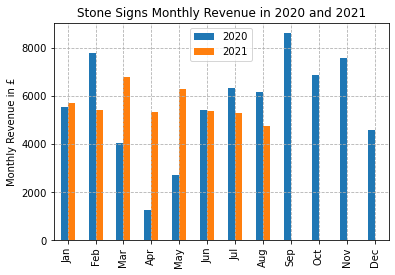

In [10]:
month_rev_bar = df_portal.groupby(['month_no','year']) ['net_charge'].sum().unstack('year')
month_rev_bar.plot.bar(stacked=False)

plt.title('Stone Signs Monthly Revenue in 2020 and 2021')
plt.xlabel('')
plt.ylabel('Monthly Revenue in £')

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--')
plt.legend(title='')

plt.savefig(os.path.join(vizpath,'Qu.4) Stone Sign Revenue by Month for 2020 & 2021.png'))

#### Note: There may be a slightly lower revenue indication for August owing to the data cut being taken on the afternoon of the 31-08-2021.

## Qu.5) How do the different areas compare in terms of work request?
    - Sales
    - Letting
    - Sponsorship
    - Commercial
    - Maintenance: Flag Change over, Displosal of Flag Tops, New Posts

### remove records where net_charge is zero as these are likely to be duplicate requests

In [11]:
df_portal = df_portal.loc[df_portal['net_charge']>0]
df_portal.shape

(28900, 39)

### create new column to merge maintenance items

In [12]:
maintain = ['Change Over','Disposal of Flag Tops','New Posts']

In [13]:
df_portal.loc[df_portal['sign_category'] == 'Sales', 'work_category'] = 'Sales'
df_portal.loc[df_portal['sign_category'] == 'Letting', 'work_category'] = 'Letting'
df_portal.loc[df_portal['sign_category'] == 'Sponsorship', 'work_category'] = 'Sponsorship'
df_portal.loc[df_portal['sign_category'] == 'Commercial', 'work_category'] = 'Commercial'
df_portal.loc[df_portal['sign_category'].isin (maintain), 'work_category'] = 'Maintenance'
df_portal.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,harvesine_distance_miles,latitude_group,longitude_group,zone,zone_area,is_up,month_no,month,year,work_category
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3508.926836,1.0,2.0,12,SE Sussex,1,10,Oct,2020,Letting
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,3508.978003,1.0,2.0,12,SE Sussex,1,11,Nov,2020,Sales
3,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,3508.978003,1.0,2.0,12,SE Sussex,0,9,Sep,2020,Sales
4,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3509.207113,1.0,2.0,12,SE Sussex,0,10,Oct,2020,Letting
5,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3509.207113,1.0,2.0,12,SE Sussex,0,3,Mar,2021,Letting


### check values counts

In [14]:
df_portal['work_category'].value_counts().sort_index()

Commercial      1307
Letting         5673
Maintenance       42
Sales          21800
Sponsorship       78
Name: work_category, dtype: int64

### calculate revenue per work category

In [15]:
category_rev = df_portal.groupby(df_portal['work_category'])['net_charge'].sum()
category_rev

work_category
Commercial      5818.50
Letting        21579.30
Maintenance      803.50
Sales          82631.05
Sponsorship      994.60
Name: net_charge, dtype: float64

## Display as Pie Chart

### define labels and value order

In [16]:
pie_label = ['Commercial','Letting','Maintenance','Sales','Sponsorship']

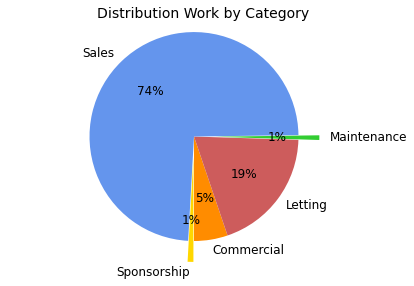

In [17]:
sizes = category_rev
colors = ['darkorange','indianred','limegreen','cornflowerblue','gold']
explode = (0, 0, 0.2, 0, 0.2)
labels = pie_label

texts = plt.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.0f%%', textprops={'fontsize':12}, startangle=-90)

plt.axis('equal')
plt.title('Distribution Work by Category', fontsize=14)
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'Distribution of Work Category by Category.png'))

#### Comments:
    1) Maintenance items have recently been added as a function within the Portal and so have only been on the 'books' for 6-8 weeks.
    2) Sponsorship tends to be seasonal and used for sporting and social events.  The pandemic has been resposible for the low activity in this area.
    3) Commercial request have historically been few and far between.
#### Decision to create subset of Sales and Letting for further analysis.  This 93% of the work load reflects typical activity on a day-to-day basis.

### export current changes to CSV

In [18]:
df_portal.to_csv(os.path.join(dataset,'stone_signs_portal_v2.1_month_workcate.csv'), index=False)

In [19]:
df_portal.shape

(28900, 40)